### **SHAPEAI - DATA SCIENTIST TRAINING & INTERNSHIP**

### **Author : Midhir Nambiar**

### **Task : Exploratory Data Analysis on Uber**

### **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **DATA ANALYSIS**

Reading and Loading the Dataset

In [2]:
df = pd.read_csv('/content/My Uber Drives - 2016.csv', encoding = 'latin1')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df.columns = df.columns.str.replace("*","")

Shape of the Dataset

In [4]:
print(df.shape)

(1156, 7)


First five values using head()

In [5]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Last five values using tail()

In [6]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


Information about the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Check for null values if any

In [8]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

Handling null values

In [9]:
df.fillna(0)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [10]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [11]:
df['PURPOSE'].isnull().sum()/len(df)*100

43.5121107266436

Using ForwardFill Method

In [12]:
df['PURPOSE'].fillna(method = 'ffill' , inplace = True)

In [13]:
df.isnull().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

### **DATA VISUALISATION**

Heatmap of our Dataset

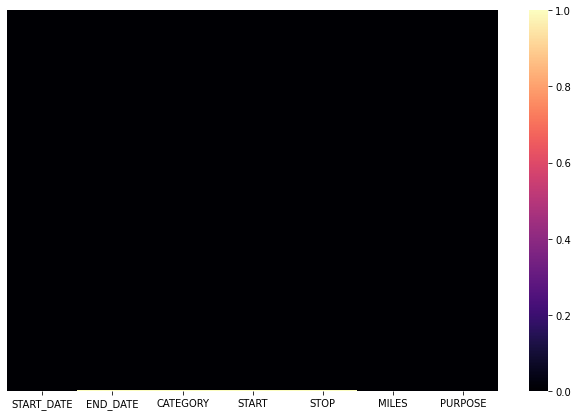

In [14]:
plt.figure(figsize=(11,7))
sns.heatmap(df.isnull(),cmap = 'magma', yticklabels = False)
plt.show()

Visualising the null values

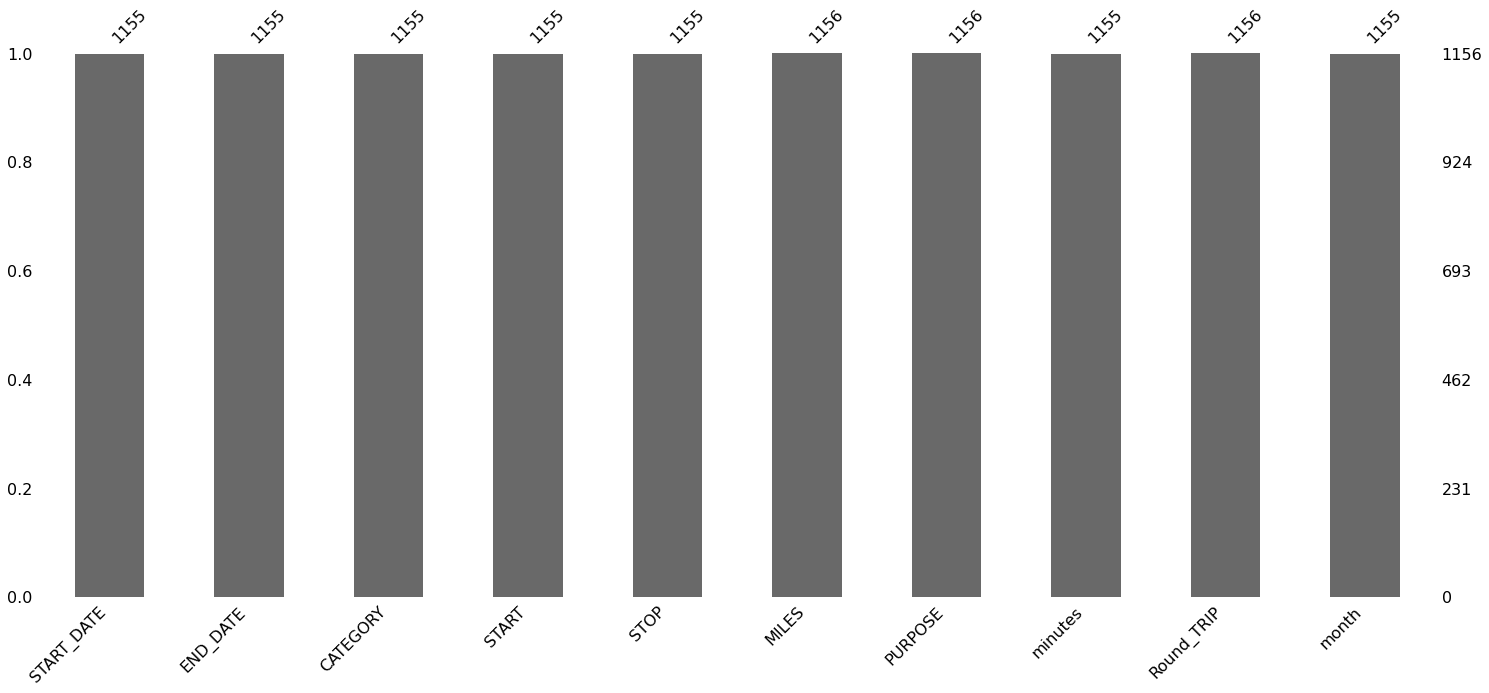

In [99]:
!pip install missingno
import missingno as msno
msno.bar(df)
plt.show()

In [16]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


Checking over the start and end date

In [17]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'] , errors = 'coerce' )
df['END_DATE'] = pd.to_datetime(df['END_DATE'] , errors = 'coerce' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [18]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


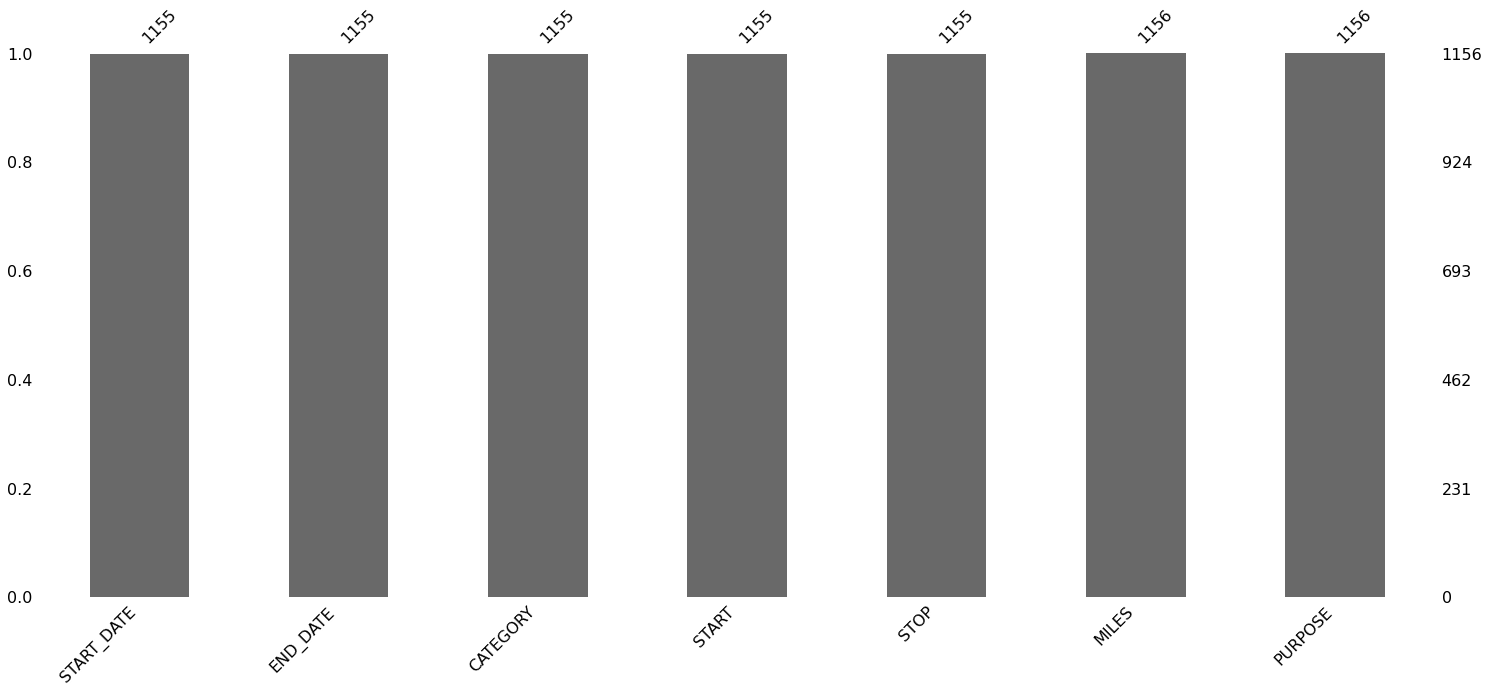

In [19]:
import missingno as msno
msno.bar(df)
plt.show()

Visualisation on the 'Category'

In [20]:
category = pd.crosstab(index = df['CATEGORY'] , columns = 'Count of travel as per category')
category

col_0,Count of travel as per category
CATEGORY,
Business,1078
Personal,77


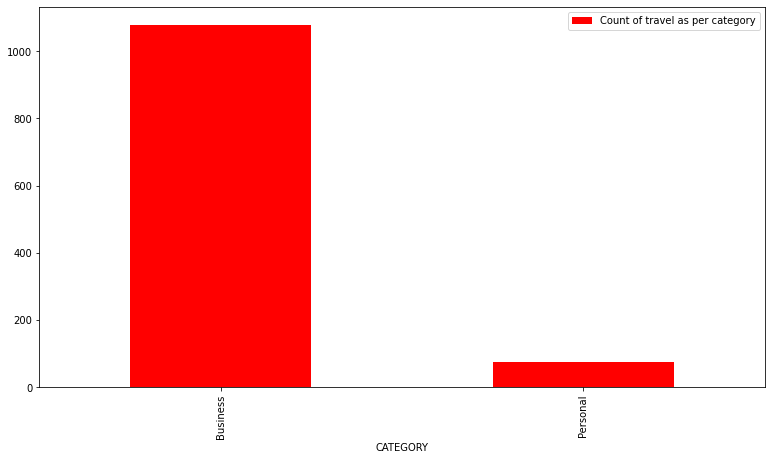

In [21]:
category.plot(kind = 'bar' , figsize = (13,7), color = 'red')
plt.legend()
plt.show()

Observation : There are more of **Business** Travels through Uber Cabs.

Visualisation on the 'Start Point > 10'

In [22]:
start_point = df.START.value_counts()
start_point
print(start_point[start_point > 10])

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
R?walpindi           11
Kenner               11
Kissimmee            11
Name: START, dtype: int64


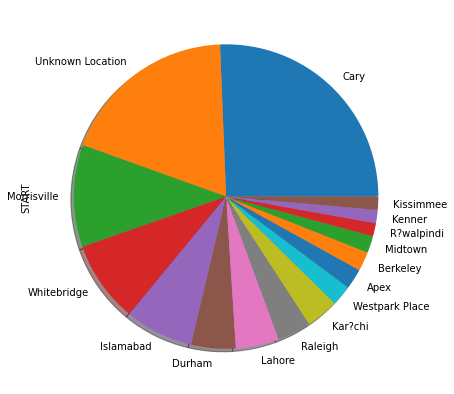

In [68]:
plt.figure(figsize =(15,7))
start_point[start_point>10].plot(kind = 'pie' , shadow = True)
plt.show()

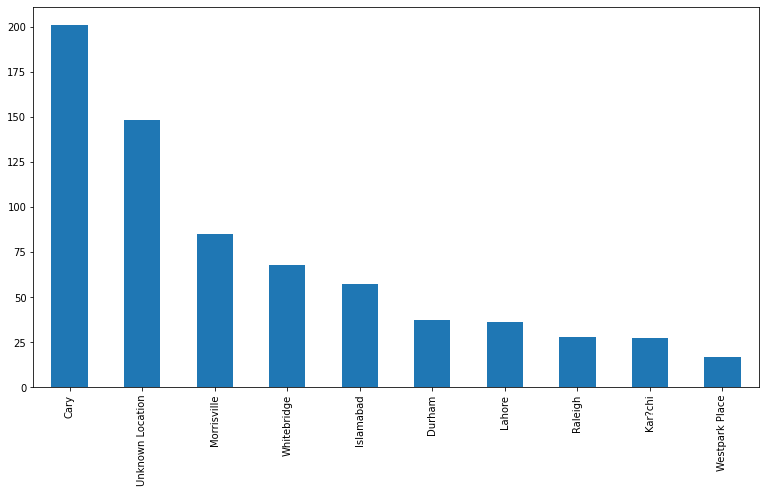

In [102]:
start_point[start_point>10][:10].plot(kind = 'bar'  ,figsize =(13,7))
plt.show()

Observation : **Cary** has been the common start point for maximum people when the distance is > 10miles.

Visualisation on the 'Start Point <=10'

In [25]:
start_point = df.START.value_counts()
start_point
print(start_point[start_point <= 10])

New Orleans      10
Emeryville       10
Downtown          9
Orlando           8
San Francisco     8
                 ..
Coxville          1
Arlington         1
Almond            1
Chalmette         1
Seattle           1
Name: START, Length: 161, dtype: int64


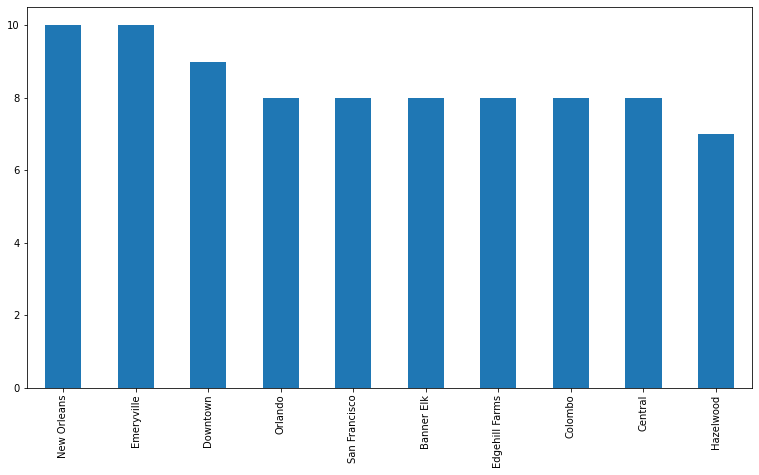

In [101]:
start_point[start_point<=10][:10].plot(kind = 'bar'  ,figsize =(13,7))
plt.show()

Observation : **New Orleans** is the common start point when the distance is <= 10miles.

Visualisation on the 'Stop Point > 10'

In [26]:
stop_point = df.STOP.value_counts()
stop_point
print(stop_point[stop_point > 10])

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64


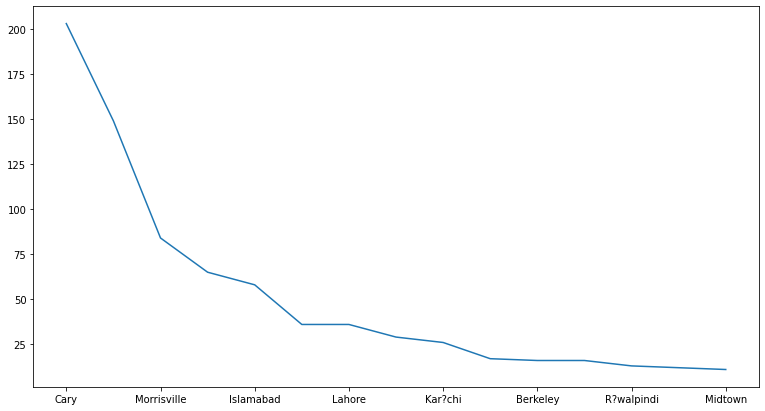

In [27]:
stop_point[stop_point>10].plot(kind = 'line'  ,figsize =(13,7))
plt.show()

Observation : **Cary** has been the most common Stop Point

Visualisation on 'Miles'

In [29]:
miles = df.MILES.value_counts()
miles
print(miles[miles>10])

9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES, dtype: int64


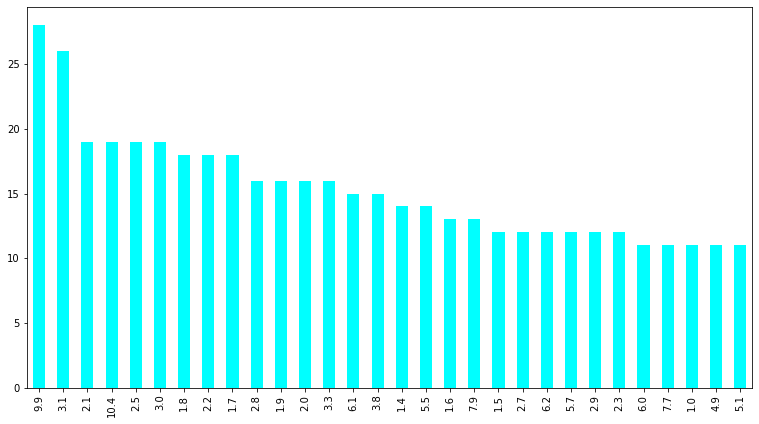

In [30]:
miles[miles>10].plot(kind = 'bar'  ,figsize =(13,7) , color = 'cyan')
plt.show()

Observation : Most of the rides have been about **9.9miles** approximately.

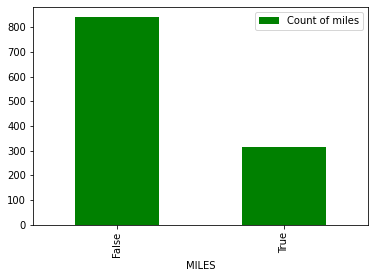

In [31]:
miles = pd.crosstab(index = df['MILES']>10 , columns = 'Count of miles')
miles.plot(kind = 'bar' , color = 'green')
plt.legend()
plt.show()

Observation : Most of the rides have been **less than 10 miles**.

Visualisation on 'Purpose'

In [32]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     197
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64


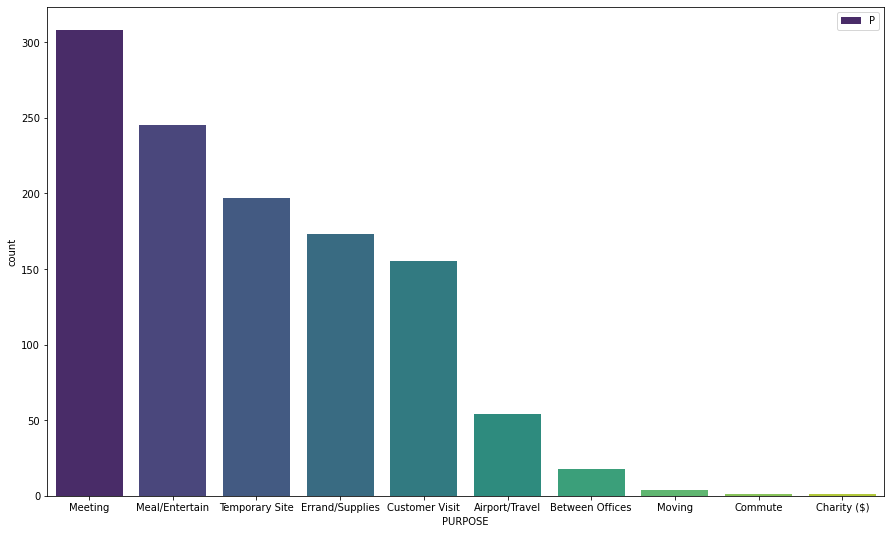

In [33]:
plt.figure(figsize = (15,9))
sns.countplot(df['PURPOSE'] , order = df['PURPOSE'].value_counts().index , palette = 'viridis')
plt.legend('Purpose')
plt.show()

Observation : Most of the rides have been for **Meeting** purposes.

Calculating the duration as there might be some relation of it with the purpose of the ride

In [34]:
df['minutes'] = df.END_DATE - df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [35]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,0 days 01:43:00
1155,NaT,NaT,NaN,NaN,NaN,12204.7,Temporary Site,NaT


Converting minutes into float for accurate visualisation

In [36]:
df['minutes'] = df['minutes'].dt.total_seconds()/60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [37]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0
1155,NaT,NaT,NaN,NaN,NaN,12204.7,Temporary Site,NaN


Grouping 'purpose' by 'miles' to see if we can get any pattern

In [38]:
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean().round(1),
              'Min':df.groupby(['PURPOSE'])['MILES'].min(),
              'Max':df.groupby(['PURPOSE'])['MILES'].max()
              }).reset_index()

,PURPOSE,Mean,Min,Max
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,72.9,0.7,12204.7


Visualisation of Purpose v Minutes & Purpose v Miles

In [98]:
df['PURPOSE'].value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     197
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

Using a BoxPlot

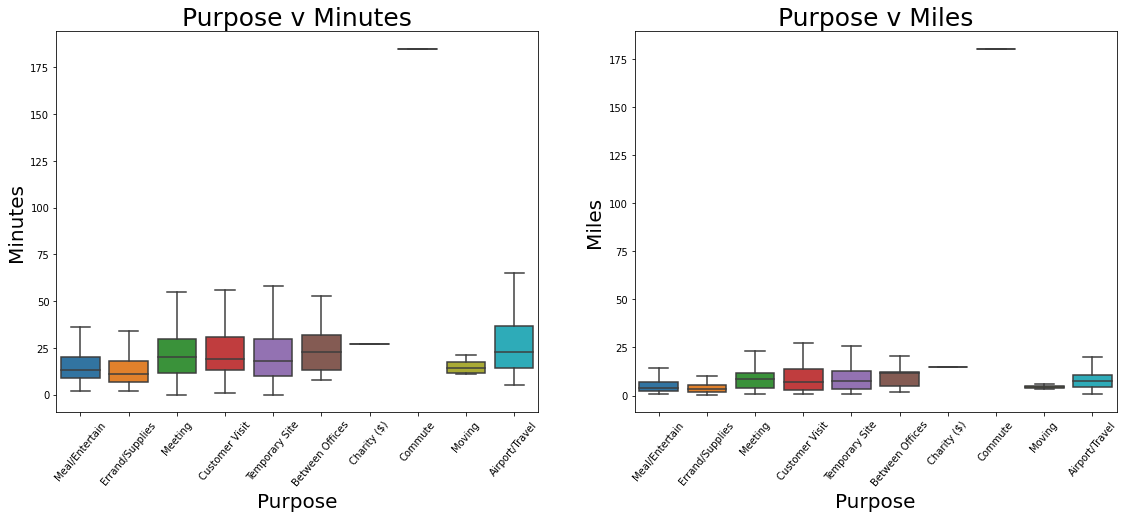

In [75]:
plt.figure(figsize=(19,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes,showfliers = False)
plt.title('Purpose v Minutes',fontsize = 25)
plt.xlabel('Purpose',fontsize = 20)
plt.ylabel('Minutes',fontsize = 20)
plt.xticks(rotation = 50)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES,showfliers = False)
plt.title('Purpose v Miles',fontsize = 25)
plt.xlabel('Purpose',fontsize = 20)
plt.ylabel('Miles',fontsize = 20)
plt.xticks(rotation = 50)
plt.show()

Observation: Rides to the **Airports** have taken maximum time with respect to 'minutes' while rides for a **Customer visit** is the ride which has covered maximum distance in terms of 'miles'

Checking for round trips , ie - start and stop points are the same

In [40]:
def round(x):
  if x['START'] == x['STOP']:
    return 'yes'
  else:
    return 'no'
df['Round_TRIP'] = df.apply(round , axis = 1)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no


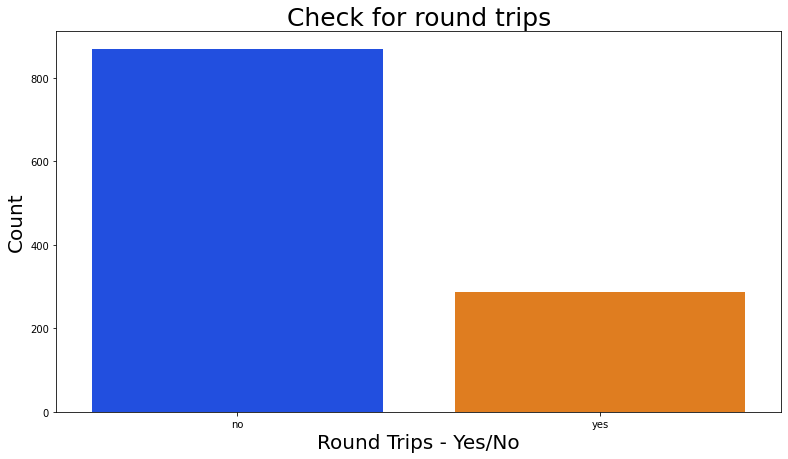

In [41]:
plt.figure(figsize=(13,7))
sns.countplot(df['Round_TRIP'], order =df['Round_TRIP'].value_counts().index,palette = 'bright')
plt.title('Check for round trips',fontsize = 25)
plt.xlabel('Round Trips - Yes/No',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Observation : There **hasn't been** much of Round Trips.

Entering month name and evaluating frequency of trip in each month

In [54]:
df['month'] = pd.DatetimeIndex(df['START_DATE']).month
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_TRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1.0
...,...,...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,12.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,12.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,12.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0,no,12.0


In [58]:
dic = {1.0:'Jan', 2.0:'Feb',3.0:'March',4.0:'April',5.0:'May',6.0:'June',7.0:'July',8.0:'Aug',9.0:'Sept',10.0:'Oct',11.0:'Nov',12.0:'Dec'}
df['month'] = df['month'].map(dic)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_TRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,Jan
...,...,...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,Dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,Dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,Dec
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0,no,Dec


Monthwise when cab rides are used

In [97]:
df['month'].value_counts()

Dec      146
Aug      133
Nov      122
Feb      115
March    113
July     112
June     108
Oct      106
Jan       61
April     54
May       49
Sept      36
Name: month, dtype: int64

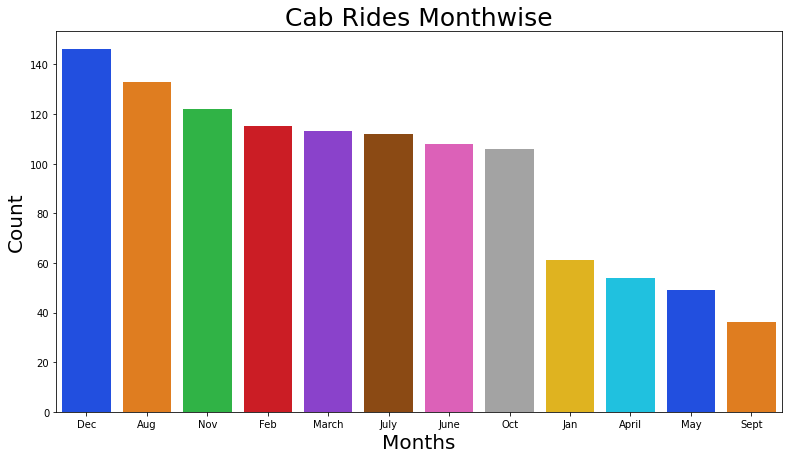

In [62]:
plt.figure(figsize = (13,7))
sns.countplot(df['month'], order = df['month'].value_counts().index, palette = 'bright')
plt.title('Cab Rides Monthwise',fontsize = 25)
plt.xlabel('Months',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Observation : Most of the cab rides were taken during the month of **December**.

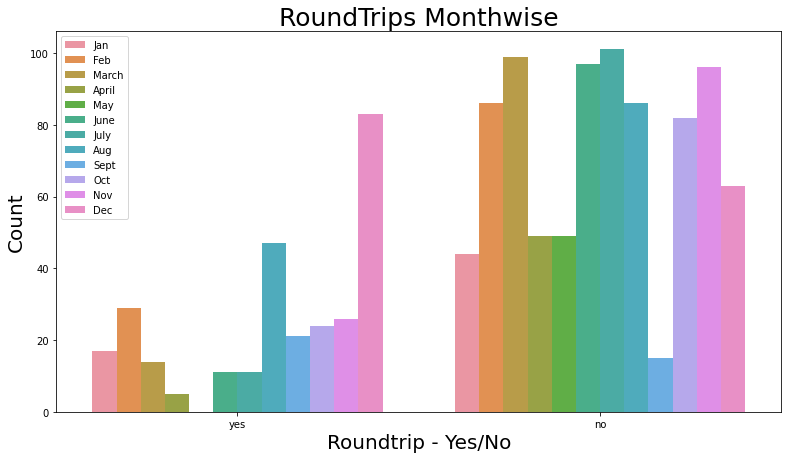

In [67]:
plt.figure(figsize = (13,7))
sns.countplot(df['Round_TRIP'],hue = df['month'])
plt.legend()
plt.title('RoundTrips Monthwise',fontsize = 25)
plt.xlabel('Roundtrip - Yes/No',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Observation : Maximum round trips were taken in **December**

Visualisation of 'Minutes v Miles'

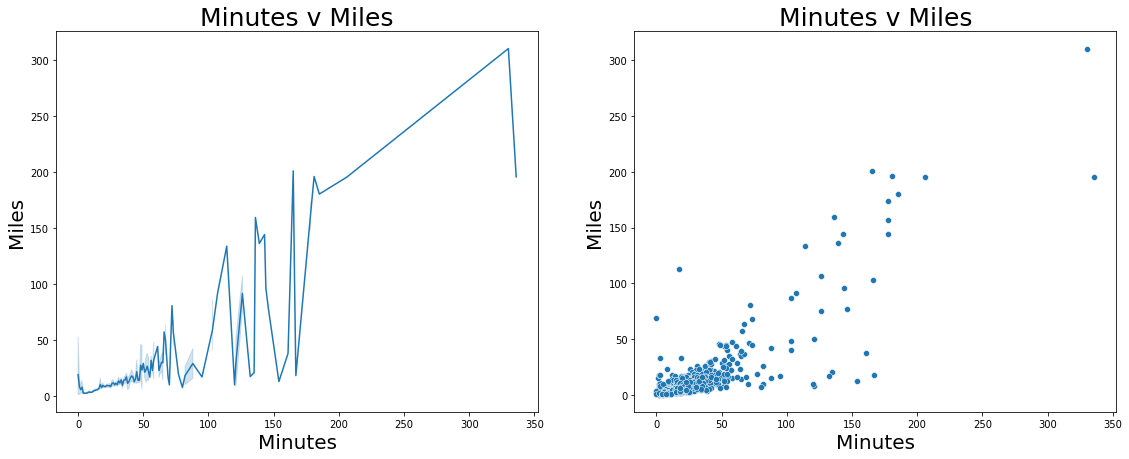

In [106]:
plt.figure(figsize=(19,7))
plt.subplot(1,2,1)
plt.title('Minutes v Miles',fontsize = 25)
plt.xlabel('Minutes',fontsize = 20)
plt.ylabel('Miles',fontsize = 20)
sns.lineplot(data = df , x = df.minutes , y = df.MILES)
plt.subplot(1,2,2)
plt.title('Minutes v Miles',fontsize = 25)
plt.xlabel('Minutes',fontsize = 20)
plt.ylabel('Miles',fontsize = 20)
sns.scatterplot(data = df , x = df.minutes , y = df.MILES)
plt.show()

Observation : Larger the distance, more is the time taken.

Distribution of Cab rides based on Category

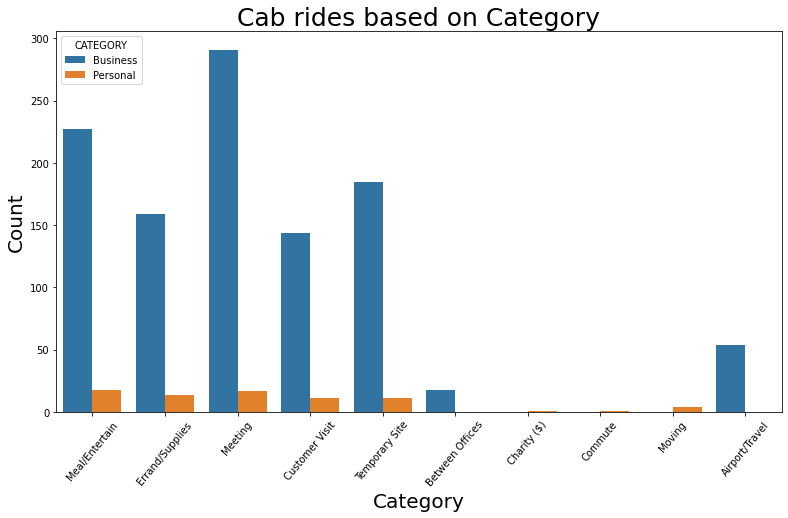

In [81]:
plt.figure(figsize=(13,7))
sns.countplot(data = df, x = 'PURPOSE' , hue = 'CATEGORY')
plt.title('Cab rides based on Category',fontsize = 25)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.xticks(rotation = 50)
plt.show()

Observation : Most of the **Business rides** were for a **meeting** while most of the **Personal rides** were for **Meal/Entertain**.

Visualisation on 'Start Point'

In [96]:
df['START'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Coxville              1
Arlington             1
Almond                1
Chalmette             1
Seattle               1
Name: START, Length: 177, dtype: int64

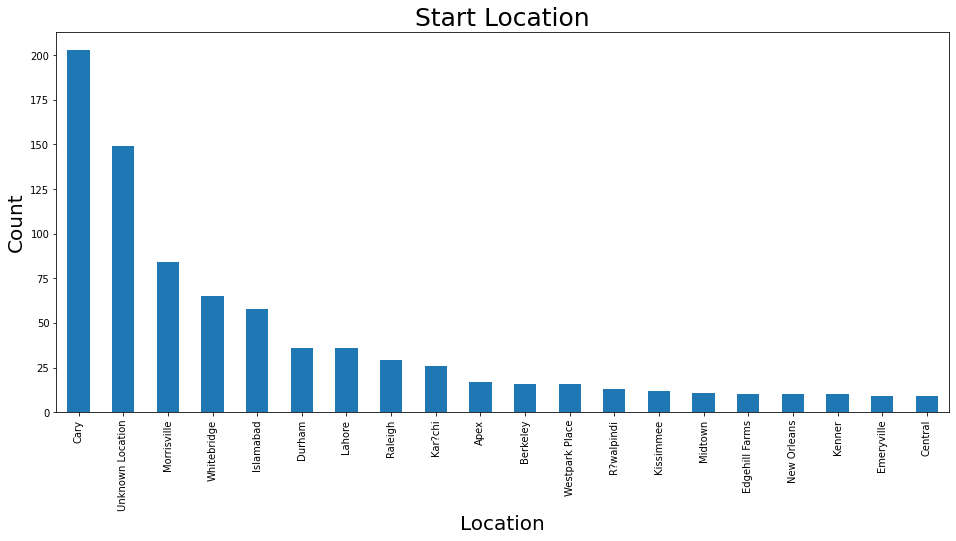

In [92]:
plt.figure(figsize=(16,7))
pd.Series(df['STOP']).value_counts()[:20].plot(kind ='bar')
plt.title('Start Location',fontsize = 25)
plt.xlabel('Location',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Observation : **Cary** is considered as the most frequent **start point**.

Visualisation on 'Stop Point'

In [95]:
df['STOP'].value_counts()

Cary                   203
Unknown Location       149
Morrisville             84
Whitebridge             65
Islamabad               58
                      ... 
Elk Park                 1
Washington               1
NoMad                    1
Lake Wellingborough      1
Coxville                 1
Name: STOP, Length: 188, dtype: int64

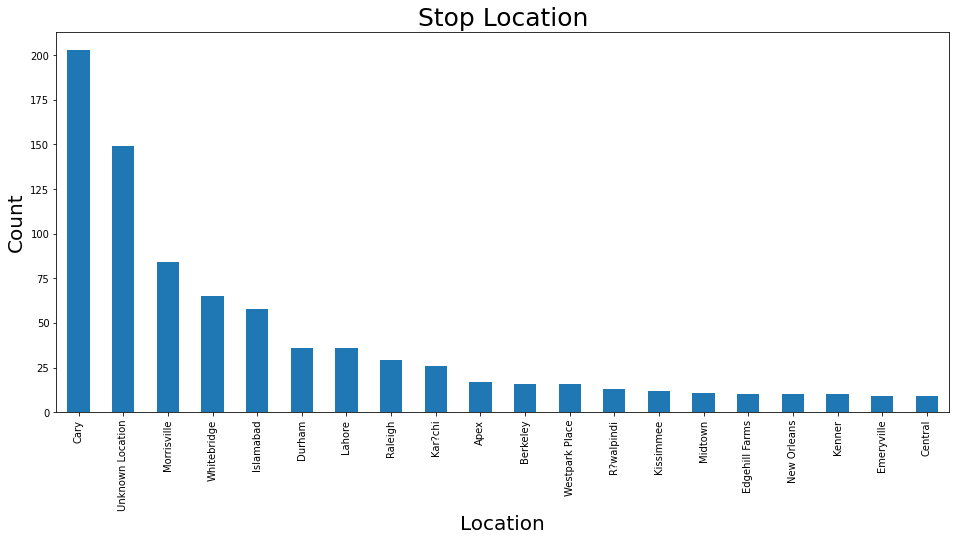

In [93]:
plt.figure(figsize=(16,7))
pd.Series(df['STOP']).value_counts()[:20].plot(kind ='bar')
plt.title('Stop Location',fontsize = 25)
plt.xlabel('Location',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Observation : **Cary** is also the most frequent **stop point**.

Conclusion :
1.   Business Cabs were not only used more in volume but also have travelled more with respect to distance.
2.   Round Trips were maximum in the month of December
3. December month can prove to be the best month for the cab drivers for earning profit by raising the fare.
4. A Seasonal Pattern is observed
5. Cab traffic was high in 5 cities comparitively.
6. Most of the cab rides are within a distance of 35 miles which take about 30 minutes.
7. Airport Cabs take longer time than usual



### **THANK YOU**